In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('kaggle_Ecommerce.csv', parse_dates=['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [4]:
# 컬럼 확인 
for col in df.columns :
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
Sales


In [5]:
print(len(df))

541909


In [6]:
# 나라별 데이터 분포 확인 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [10]:
nation_data = Counter(df['Country']).most_common() # 데이터 갯수가 많은 순으로 출력
nation_data = nation_data[:5] # 상위 5개만 저장
nation_data

[('United Kingdom', 495478),
 ('Germany', 9495),
 ('France', 8557),
 ('EIRE', 8196),
 ('Spain', 2533)]

In [11]:
data = [x[1] for x in nation_data] ## 데이터 갯수
data

[495478, 9495, 8557, 8196, 2533]

In [12]:
nations = [x[0] for x in nation_data] ## 국가
nations

['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain']

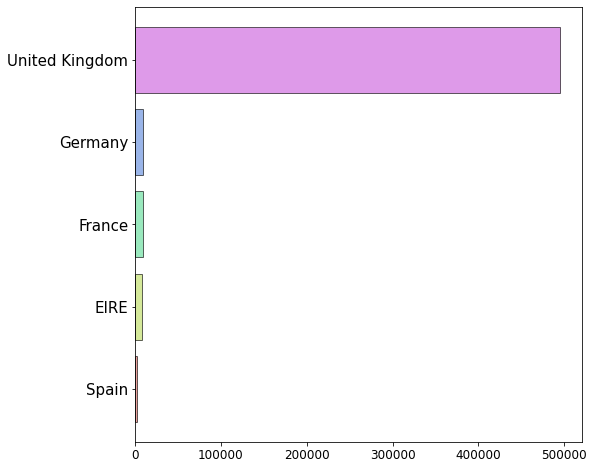

In [15]:
# 수평 바차트에서 데이터 갯수와 나라를 맨위로 출력하기 위해 리스트 순서바꿈
nations.reverse()
data.reverse()

# 시각화
fig = plt.figure(figsize=(8,8))

fig.set_facecolor('white') 
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize = 15) 
plt.xticks(fontsize = 12)

plt.barh(nations, data, color=colors, alpha = 0.6, edgecolor='k')
plt.show()

### 데이터 전처리

In [16]:
# 데이터 전처리
## 분석할 나라와 연도 설정
target_country = 'United Kingdom'
target_year = '2011'
 
df = df.query('Country == @target_country and InvoiceDate.dt.year == @target_year')
 
## 필요한 칼럼 추출
df = df[['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']]

In [17]:
## 결측값 처리
df = df.dropna()
 
## 구매 취소 데이터 삭제
 
## 송장번호 앞에 'C'가 있으면 삭제 구매취소된 데이터를 의미한다. 여기서는 단순히 'C'가 있는지 없는지만 보면된다.
df = df.query('InvoiceNo.str.get(0) != "C"')

In [18]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
42481,539993,10,2011-01-04 10:00:00,1.95,13313.0
42482,539993,25,2011-01-04 10:00:00,0.42,13313.0
42483,539993,25,2011-01-04 10:00:00,0.42,13313.0
42484,539993,5,2011-01-04 10:00:00,2.10,13313.0
42485,539993,10,2011-01-04 10:00:00,1.25,13313.0
...,...,...,...,...,...
541889,581585,12,2011-12-09 12:31:00,1.95,15804.0
541890,581586,8,2011-12-09 12:49:00,2.95,13113.0
541891,581586,24,2011-12-09 12:49:00,1.25,13113.0
541892,581586,24,2011-12-09 12:49:00,8.95,13113.0


### 데이터 분석

In [20]:
from tqdm import tqdm
# for loop 를 실행할 때 progress bar를 출력해주는 모듈 -> 남은시간 확인 가능

In [21]:
customer_id = list(df['CustomerID'].unique()) # 고객 아이디

# 각 고객별로 구매 금액이 얼마인지 알아보자
monetary_df = pd.DataFrame() 
monetary_df['CustomerID'] = customer_id

monetary_data = [] # 구매금액을 담을 리스트 
for ci in tqdm(customer_id, position = 0, desc='Calculating amount of individual customer') :
    temp = df.query('CustomerID==@ci') # 해당 아이디의 고객데이터 추출
    amount = sum(temp['Quantity'] * temp['UnitPrice']) # 해당 고객의 구매금액 
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data # 구매금액 데이터 삽입

Calculating amount of individual customer: 100%|██████████████████████████████████| 3814/3814 [00:30<00:00, 124.59it/s]


In [26]:
monetary_df

,CustomerID,Monetary
0,13313.0,1555.32
1,18097.0,2515.28
2,16656.0,8197.04
3,16875.0,2095.53
4,13094.0,1703.64
...,...,...
3809,15471.0,469.48
3810,13436.0,196.89
3811,15520.0,343.50
3812,13298.0,360.00


In [24]:
# 각 고객병 최근 방문일을 알아보자. 
temp_recency_df = df[['CustomerID','InvoiceDate']].drop_duplicates() # 고객아이디와 송장날짜만 추출한 뒤 중복제거
recency_df = temp_recency_df.groupby('CustomerID')['InvoiceDate'].max().reset_index() ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df = recency_df.rename(columns = {'InvoiceDate' : 'Recency'})
recency_df

,CustomerID,Recency
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00
...,...,...
3809,18280.0,2011-03-07 09:52:00
3810,18281.0,2011-06-12 10:53:00
3811,18282.0,2011-12-02 11:43:00
3812,18283.0,2011-12-06 12:02:00


In [25]:
# 각 고객별 방문 횟수를 알아보자
temp_frequency_df = df[['CustomerID','InvoiceNo']].drop_duplicates() # 고객 아이디와 송장 번호만 추출한뒤 중복 제거
frequency_df = temp_frequency_df.groupby('CustomerID')['InvoiceNo'].count().reset_index() ## 아이디로 그룹화 한다음 방문횟수를 구해야 한다. 여기서는 방문횟수를 송장번호 개수로 생각했으므로 송장번호에 count를 적용한다
frequency_df = frequency_df.rename(columns = {'InvoiceNo':'Frequency'})
frequency_df

,CustomerID,Frequency
0,12346.0,1
1,12747.0,9
2,12748.0,175
3,12749.0,5
4,12820.0,4
...,...,...
3809,18280.0,1
3810,18281.0,1
3811,18282.0,2
3812,18283.0,16


In [27]:
## 데이터를 고객아이디를 기준으로 합쳐야한다.
rfm_df = pd.merge(recency_df,frequency_df,how='left',on='CustomerID')
rfm_df = pd.merge(rfm_df,monetary_df,how='left',on='CustomerID')

In [28]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12747.0,2011-12-07 14:34:00,9,3489.74
2,12748.0,2011-12-09 12:20:00,175,29491.60
3,12749.0,2011-12-06 09:56:00,5,4090.88
4,12820.0,2011-12-06 15:12:00,4,942.34
...,...,...,...,...
3809,18280.0,2011-03-07 09:52:00,1,180.60
3810,18281.0,2011-06-12 10:53:00,1,80.82
3811,18282.0,2011-12-02 11:43:00,2,178.05
3812,18283.0,2011-12-06 12:02:00,16,2094.88


In [29]:
## 데이터 변환
current_day = pd.to_datetime('20110101') ## 기준 날짜를 2011년 1월 1일 0시 0분으로 잡았다.
time_diff = rfm_df['Recency']-current_day ## 최근방문일과 기준 날짜의 시간 차이
time_in_seconds = [x.total_seconds() for x in time_diff] ## 시간 차이를 초단위로 계산
rfm_df['Recency'] = time_in_seconds ## 변환된 데이터를 다시 삽입한다.

In [30]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,1504860.0,1,77183.60
1,12747.0,29428440.0,9,3489.74
2,12748.0,29593200.0,175,29491.60
3,12749.0,29325360.0,5,4090.88
4,12820.0,29344320.0,4,942.34
...,...,...,...,...
3809,18280.0,5651520.0,1,180.60
3810,18281.0,14035980.0,1,80.82
3811,18282.0,28986180.0,2,178.05
3812,18283.0,29332920.0,16,2094.88


In [31]:
def get_score(level, data):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue 
    return score

In [32]:
def get_rfm_grade(df, num_class, rfm_tick_point, rfm_col_map, suffix=None):
    '''
    Description :
    개별 고객에 대한 최근방문일/방문횟수/구매금액 데이터가 주어졌을때
    최근방문일/방문횟수/구매금액 점수를 계산하여 주어진 데이터 오른쪽에 붙여줍니다.
    
    Parameters :
    df = pandas.DataFrame 데이터
    num_class = 등급(점수) 개수
    rfm_tick_point = 최근방문일/방문횟수/구매금액에 대해서 등급을 나눌 기준이 되는 값
                    'quantile', 'min_max' 또는 리스트를 통하여 직접 값을 정할 수 있음.
                    단, 리스트 사용시 원소의 개수는 반드시 num_class - 1 이어야함.
                    quatile = 데이터의 분위수를 기준으로 점수를 매김
                    min_max = 데이터의 최소값과 최대값을 동일 간격으로 나누어 점수를 매김
    rfm_col_map = 최근방문일/방문횟수/구매금액에 대응하는 칼럼명
    예 - {'R':'Recency','F':'Frequency','M':'Monetary'}
    suffix = 최근방문일/방문횟수/구매금액에 대응하는 칼럼명 뒤에 붙는 접미사
    Return : 
    pandas.DataFrame
    '''
    ##### 필요모듈 체크
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing
    
    ##### 파라미터 체크
    if not isinstance(df, pd.DataFrame): ## 데이터는 pd.DataFrame이어야 함.
        print('데이터는 pandas.DataFrame 객체여야 합니다.')
        return
    
    if isinstance(rfm_tick_point, dict) == False or isinstance(rfm_col_map, dict) == False: ## rfm_tick_point와 rfm_col_map은 모두 딕셔너리
        print(f'rfm_tick_point와 rfm_col_map은 모두 딕셔너리여야합니다.')
        return
    
    if len(rfm_col_map) != 3: ## rfm_col_map에는 반드시 3개의 키를 가져아함.
        print(f'rfm_col_map인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if len(rfm_tick_point) != 3: ## rfm_tick_point에는 반드시 3개의 키를 가져아함.
        print(f'rfm_tick_point인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if set(rfm_tick_point.keys()) != set(rfm_col_map.keys()): ## rfm_tick_point와 rfm_col_map은 같은 키를 가져야함.
        print(f'rfm_tick_point와 rfm_col_map은 같은 키를 가져야 합니다.')
        return
    
    if not set(rfm_col_map.values()).issubset(set(df.columns)):
        not_in_df = set(rfm_col_map.values())-set(df.columns)
        print(f'{not_in_df}이 데이터 칼럼에 있어야 합니다.')
        return
    
    for k, v in rfm_tick_point.items():
        if isinstance(v, str):
            if not v in ['quantile','min_max']:
                print(f'{k}의 값은 "quantile" 또는 "min_max"중에 하나여야 합니다.')
                return
        elif isinstance(v,list) or isinstance(v,tuple):
            if len(v) != num_class-1:
                print(f'{k}에 대응하는 리스트(튜플)의 원소는 {num_class-1}개여야 합니다.')
                return
    
    if suffix:
        if not isinstance(suffix, str):
            print('suffix인자는 문자열이어야합니다.')
            return
        
    ##### 최근방문일/방문횟수/구매금액 점수 부여
    for k, v in rfm_tick_point.items():
        if isinstance(v,str):
            if v == 'quantile':
                ## 데이터 변환
                scale = preprocessing.StandardScaler() ## 데이터의 범위 조작하기 쉽게 해주는 클래스 
                temp_data = np.array(df[rfm_col_map[k]]) ## 데이터를 Numpy 배열로 변환
                temp_data = temp_data.reshape((-1,1)) ## scale을 적용하기위해 1차원 배열을 2차원으로 변환
                temp_data = scale.fit_transform(temp_data) ## 데이터를 평균은 0, 표준편차는 1을 갖도록 변환 
                temp_data = temp_data.squeeze() ## 데이터를 다시 1차원으로 변환
 
                ## 분위수 벡터
                quantiles_level = np.linspace(0,1,num_class+1)[1:-1] ## 분위수를 구할 기준값을 지정 0과 1은 제외
                quantiles = [] ## 분위수를 담을 리스트
                for ql in quantiles_level:
                    quantiles.append(np.quantile(temp_data,ql)) ## 분위수를 계산하고 리스트에 삽입
            else: ## min_max인 경우
                ## 데이터 변환
                temp_data = np.array(df[rfm_col_map[k]])
 
                ## 등분점 계산
                quantiles = np.linspace(np.min(temp_data),np.max(temp_data),num_class+1)[1:-1] ## 최소값과 최대값을 점수 개수만큼 등간격으로 분할하는 점
        else: ## 직접 구분값을 넣어주는 경우
            temp_data = np.array(df[rfm_col_map[k]])
            quantiles = v ## 직접 구분값을 넣어줌
        score = get_score(quantiles, temp_data) ## 구분값을 기준으로 점수를 부여하고 리스트로 저장한다.
        new_col_name = rfm_col_map[k]+'_'+k ## 점수값을 담는 변수의 이름
        if suffix:
            new_col_name = rfm_col_map[k]+'_'+suffix
        df[new_col_name] = score ## 기존데이터 옆에 점수 데이터를 추가한다.
    return df

In [33]:
rfm_tick_point={'R':'quantile','F':'quantile','M':'quantile'}
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}
 
result = get_rfm_grade(df=rfm_df, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result.to_csv('result.csv',index=False)

In [34]:
result[['CustomerID','Recency_R','Frequency_F','Monetary_M']]

,CustomerID,Recency_R,Frequency_F,Monetary_M
0,12346.0,1,2,5
1,12747.0,5,5,5
2,12748.0,5,5,5
3,12749.0,5,4,5
4,12820.0,5,4,4
...,...,...,...,...
3809,18280.0,1,2,1
3810,18281.0,1,2,1
3811,18282.0,5,2,1
3812,18283.0,5,5,5


In [39]:
## 필요 변수 추출
rfm_score = pd.read_csv('result.csv') ## 데이터 불러오기
rfm_score = rfm_score[['CustomerID', 'Monetary', 'Recency_R','Frequency_F','Monetary_M']]

In [40]:
import pandas as pd
import numpy as np
 
from tqdm import tqdm

In [41]:
def get_score(level, data, reverse = False):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    reverse = 점수가 높을 때 그에 해당하는 값을 낮게 설정하고 싶을 때 True
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score

In [42]:
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## 클래스 개수
class_level = np.linspace(1,5,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = rfm_score['Monetary'].sum() ## 구매금액 총합 = 총 매출

In [50]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*rfm_score['Recency_R'] + \
                        w[1]*rfm_score['Frequency_F'] + \
                        w[2]*rfm_score['Monetary_M'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_rfm_score = rfm_score.groupby('Class')['Monetary'].sum().reset_index()
    
    ## 제약조건 추가 - 등급이 높은 고객들의 매출이 낮은 등급의 고객들보다 커야한다.
    grouped_rfm_score = grouped_rfm_score.sort_values('Class')
    
    temp_monetary = list(grouped_rfm_score['Monetary'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
    
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_rfm_score['Monetary'] = grouped_rfm_score['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['Monetary'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|█████████████████████████████████████████████████| 5151/5151 [3:11:23<00:00,  2.23s/it]


In [51]:
print(optimal_weights)

(0.0, 0.26, 0.74)


In [52]:
score = optimal_weights[0]*rfm_score['Recency_R'] + \
        optimal_weights[1]*rfm_score['Frequency_F'] + \
        optimal_weights[2]*rfm_score['Monetary_M'] ## 고객별 점수 계산
 
rfm_score['Class'] = get_score(class_level,score,True) ## 고객별 등급 부여

In [53]:
## 클래스별 고객 수 계산
temp_rfm_score1 = rfm_score.groupby('Class')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = rfm_score.groupby('Class')['Monetary'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['Monetary'] = temp_rfm_score2['Monetary'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))

In [54]:
result_df

,Class,Count,Monetary
0,1,913,0.759984
1,2,629,0.115659
2,3,748,0.070348
3,4,762,0.037681
4,5,762,0.016328
